<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 6 -Linear Regression

**Importing the libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, explained_variance_score
import math

In [24]:
#loading the data
data=pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Data Preprocessing**

In [25]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
#first finding all the categorical columns from the dataset
def check_categorical_columns(df):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':
            categorical_columns.append(column)
    return categorical_columns


categorical_columns = check_categorical_columns(data)
print('The categorical columns are as follows:  ')
print(categorical_columns)

The categorical columns are as follows:  
['sex', 'smoker', 'region']


In [27]:
#label encoding
le=LabelEncoder()
for column in categorical_columns:
  data[column]=le.fit_transform(data[column])

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Building the model

In [28]:
#declaring our features and our target variable
X=data.drop(['charges'],axis=1)
y=data['charges']

In [29]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
y_true = y_test

In [41]:
#Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)


Mean Absolute Error (MAE):  4186.508898366433


*Mean Absolute Error (MAE): On average tells us  how far off our predictions are from the actual values.*

In [40]:
#Mean Squared Error (MSE)
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

Mean Squared Error (MSE):  33635210.431178406


Mean Squared Error (MSE): On average tells us how much our predictions deviate from actual values, with a focus on larger errors.

In [46]:
#Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )

Root Mean Squared Error (RMSE): 5799.587091438356


 Root Mean Squared Error (RMSE): Similar to MSE but in a more understandable unit, like the original data.

In [49]:
#R-squared (R2) score
r2 = r2_score(y_true, y_pred)
print("R-squared (R²) Score :",r2)

R-squared (R²) Score : 0.7833463107364539


*R-squared (R2) Score: R2 measures the proportion of variance in the target variable explained by the model; higher values indicate better fit.*


In [67]:
#Adjusted R-squared score
num_predictors = X_test.shape[1]
n = len(y_test)
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
print("Adjusted R-squared:",adjusted_r_squared)

Adjusted R-squared: 0.7783657661556826


*Adjusted R-squared Score: Adjusted R2 adjusts R2 for the number of predictors, offering a more realistic assessment of model fit in multiple regression.*

In [68]:
#Residual Sum of Squares (RSS)
rss = ((y_true - y_pred) ** 2).sum()
print("Residual Sum of Squares (RSS): ",rss)

Residual Sum of Squares (RSS):  9014236395.555813


*Residual Sum of Squares (RSS): RSS calculates the sum of squared prediction errors, reflecting model goodness of fit.*

In [69]:
#Explained Variance Score
explained_variance = explained_variance_score(y_true, y_pred)
print("Explained Variance Score: ",explained_variance)

Explained Variance Score:  0.7836717590532514


*Explained Variance Score: How much of the variation in our data is explained by our model, in percentage terms; higher values indicate better explanation.*

In [70]:
#Feature Importance:
feature_importance = linear_reg.coef_
feature_importance

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04, -2.71284266e+02])

From the metric we can observe that the age,BMI,children and smoker are positive this basically mean that as the value of these columns increase the value of the target value also increases whereas for the gender and region columns we see a negative value but as these columns are categorical it does not have too much of an effect on the target value but in general if  there were other numerical columns that a negative value it basically means that as the value of teh feature increases the value of the target value decreases.

#EDA

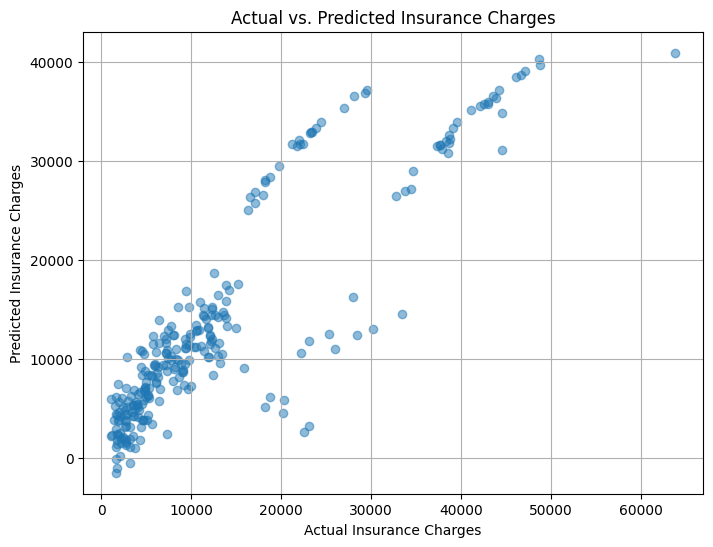

In [66]:
#actual insurance charges vs. predicted
#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)
plt.show()

# Inference from the graph
From the above plotted graph we can observe that the not all the predictions made by the model are accurate as we can see that the predicted value does not match with the actual value

<Axes: title={'center': 'Age distribution'}, xlabel='age', ylabel='Count'>

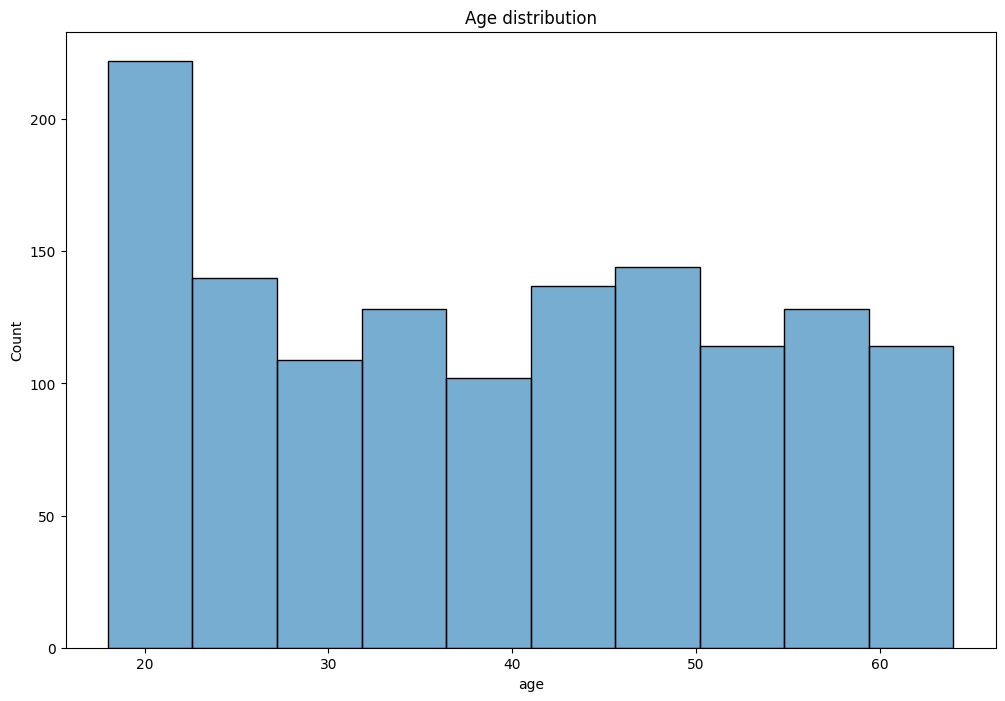

In [76]:
plt.figure(figsize=(12,8))
plt.title('Age distribution')
sns.histplot(data,x='age',alpha=0.6,bins=10)

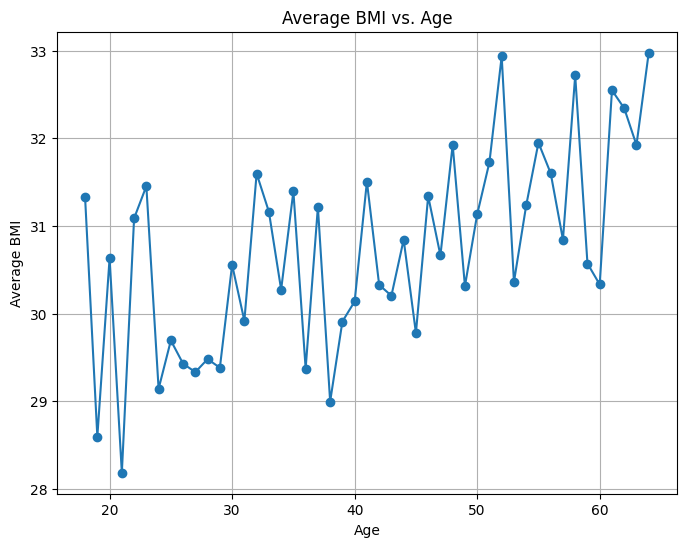

In [77]:
avg_bmi_by_age = data.groupby('age')['bmi'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.plot(avg_bmi_by_age['age'], avg_bmi_by_age['bmi'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.title('Average BMI vs. Age')
plt.grid(True)
plt.show()

#Inference from the graph
From this graph we can observe that as the age increases there is steady increases in the bmi.This could mean that with age the person gradually beacomes unhealthy.

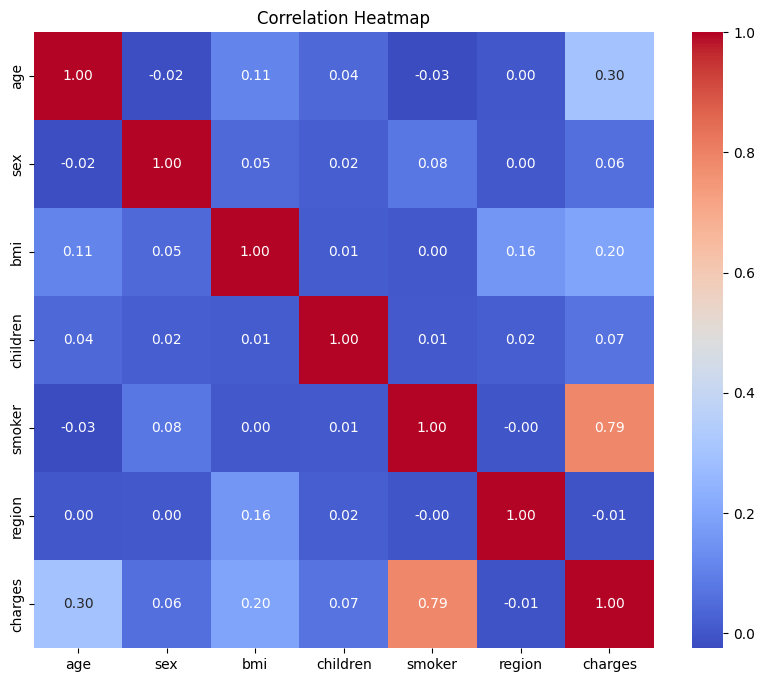

In [79]:
correlation=data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Inference from the graph
From this graph we can observe that the columns smoker and charges have a strong relationship this could basically mean that if the person is a smoker then his/her insurance charges  is likely to be high as well.

#Recommendation
Factors such as smoking and bmi have an influence on the charge of teh insurance.Individuals can reduce their insurance cost by leading healthy life i.e by not smoking or indulging in bad habits that put their health at risk and as person ages he/she should maintain their bmi/weight in such a way that it neither too low nor high.